<a href="https://colab.research.google.com/github/pankajjadhav1505/Ola_App_Reviews-Sentiment_Analysis_and_Text_Classification/blob/main/Ola_Ride_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries -

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [3]:
import nltk
from nltk.corpus import stopwords

In [4]:
# Load Dataset

In [5]:
data = pd.read_csv('/content/ola_reviews.csv')

In [6]:
# Data Overview -

In [7]:
data.head()

,review_id,rating,review_text
0,1e4c163e-144a-4ea4-b0bd-80e5e9f259bd,1,unexpected charges if driver cancel ride don't...
1,447aaf31-3968-45f1-877f-5e04d230606a,2,some problem with the app. Card is saved but c...
2,84e9cae0-5cb2-439f-8cd4-ba97fe72b478,3,Services of RAPIDO are far better.
3,2d50f89e-025a-4a29-88ab-00c5ee052bfe,1,Adding cancellation charges while the driver i...
4,49bcf932-c446-461a-ae58-a2c5f6d91fe6,1,very costly - uber is good


In [8]:
data.tail()

,review_id,rating,review_text
9995,224fca30-25c4-4924-bea8-13633d0754cc,5,good app
9996,f813ae5e-68f7-4478-b297-8e60194e52e2,1,location issue... worst map
9997,f96beec1-b3df-4b35-8e06-a5cc15c7e33c,5,very convenient
9998,1494030d-3122-4b84-96c0-315fecc6541c,1,worst app..
9999,aedab05a-6c18-49e7-a8df-54f253e025fb,5,qood service


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   rating       10000 non-null  int64 
 2   review_text  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [10]:
data.shape

(10000, 3)

In [11]:
data.isna().sum()

,0
review_id,0
rating,0
review_text,0


In [12]:
data.duplicated().sum()

np.int64(0)

/tmp/ipython-input-595882592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['rating'], palette='viridis')


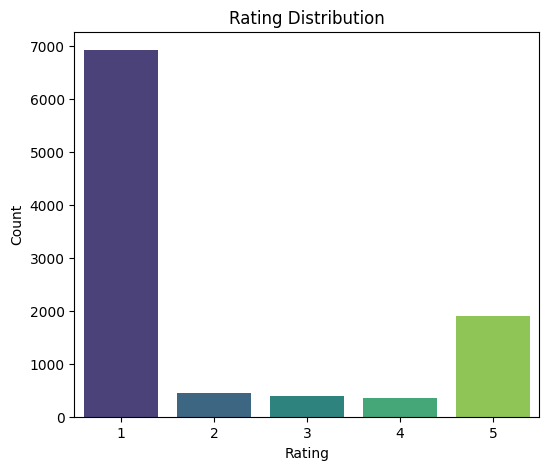

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(x=data['rating'], palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [14]:
# Rating Distribution

data['rating'].value_counts()

,count
rating,
1,6926
5,1897
2,446
3,383
4,348


In [15]:
# Reviews Length Analysis -

In [16]:
# Add Review Length column
data['review_length'] = data['review_text'].astype(str).apply(len)

In [17]:
data['review_length'].describe()

,review_length
count,10000.000000
mean,133.868800
std,138.263773
min,4.000000
25%,30.000000
50%,77.000000
75%,191.000000
max,500.000000


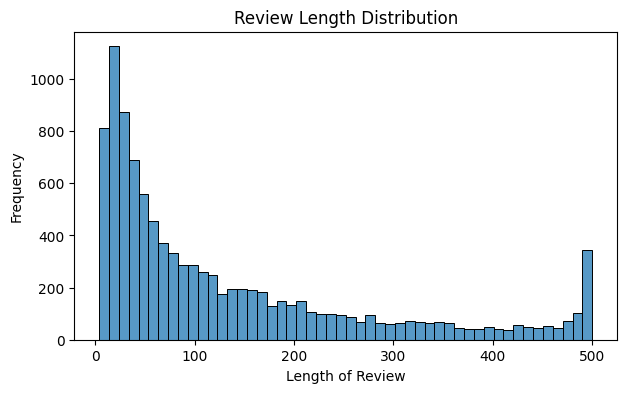

In [18]:
# Plot review_length distribution -

plt.figure(figsize=(7,4))
sns.histplot(data['review_length'],bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

In [19]:
# WordCloud of all reviews -

In [20]:
all_text = " ".join(data['review_text'].astype(str))

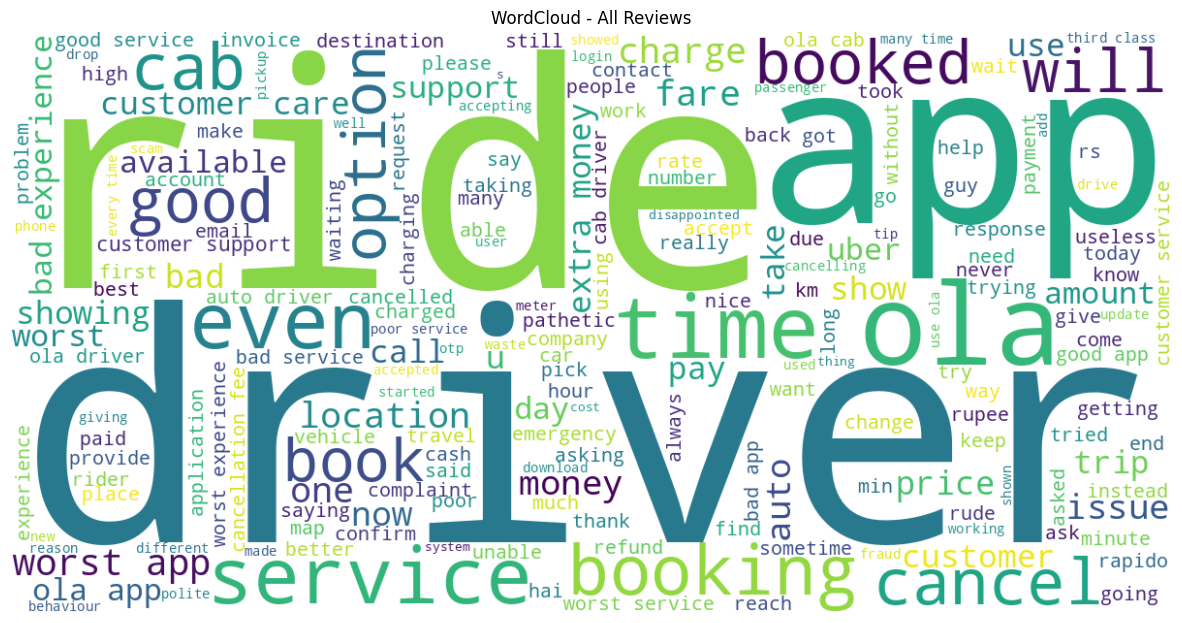

In [21]:
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(all_text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - All Reviews')
plt.show()

In [22]:
# Sentiment Creation (Based on rating) -

In [23]:
def rating_to_sentiment(r):
    if r <= 2:
        return 'Negative'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [24]:
data['sentiment'] = data['rating'].apply(rating_to_sentiment)

In [25]:
data['sentiment'].value_counts()

,count
sentiment,
Negative,7372
Positive,2245
Neutral,383


In [26]:
# WordCloud for Positive & Negeative Reviews

In [27]:
positive_text = " ".join(data[data['sentiment']=='Positive']['review_text'])
negative_text = " ".join(data[data['sentiment']=='Negative']['review_text'])

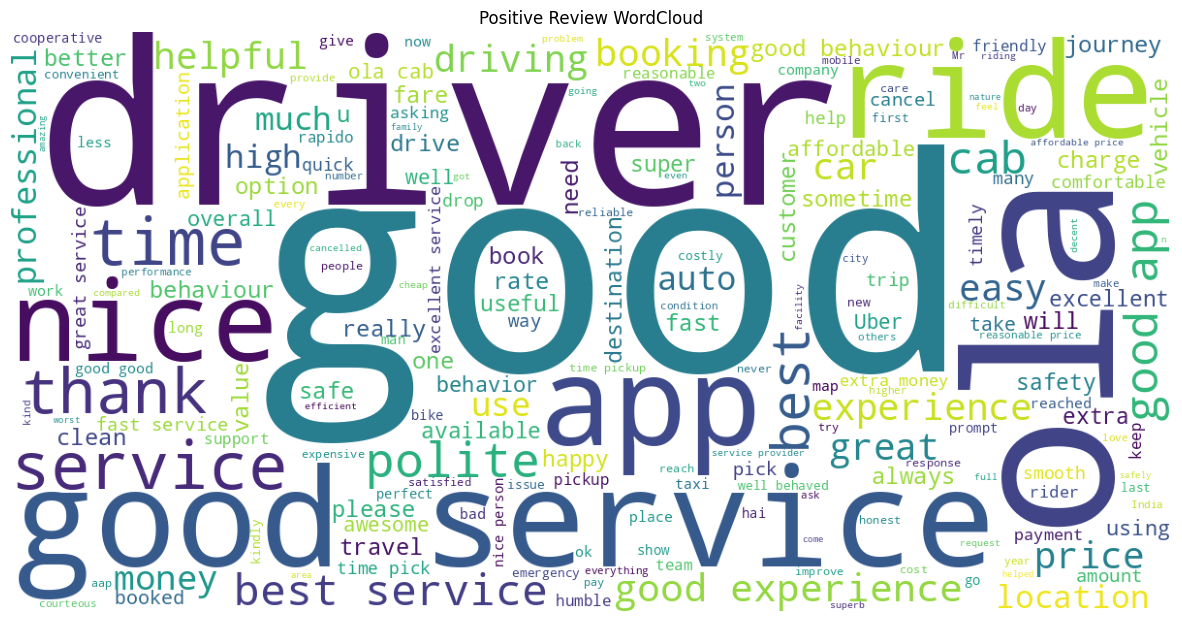

In [28]:
# Positive WordCloud
plt.figure(figsize=(15,8))
plt.imshow(WordCloud(width=1200, height=600, background_color='white').generate(positive_text))
plt.axis('off')
plt.title('Positive Review WordCloud')
plt.show()

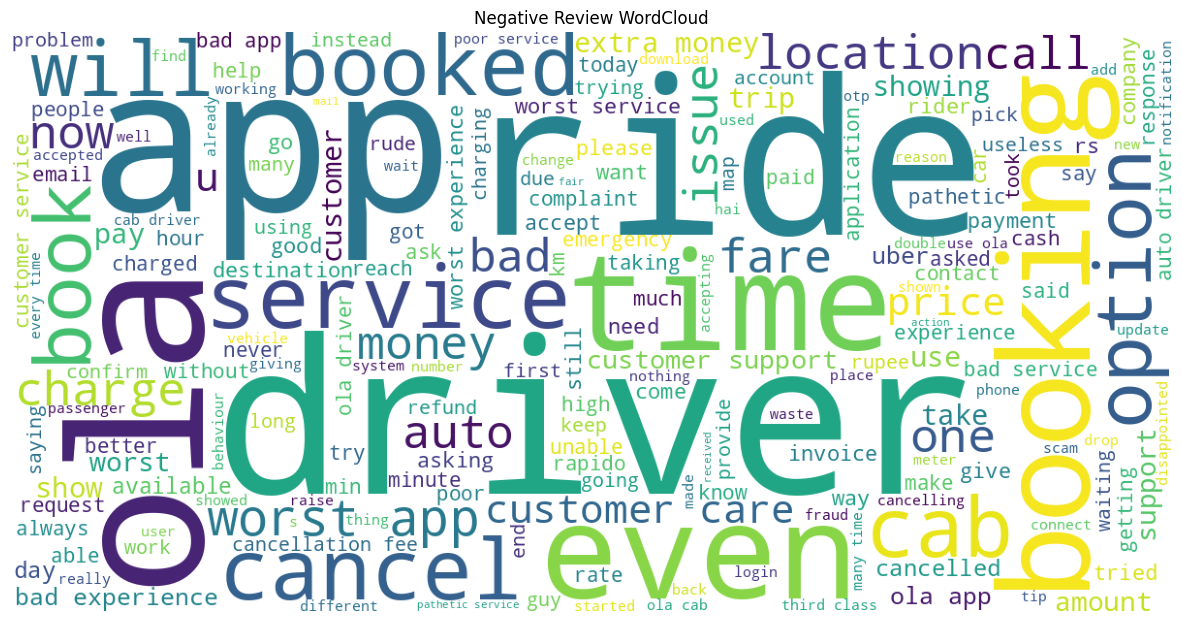

In [29]:
# Negative WordCloud
plt.figure(figsize=(15,8))
plt.imshow(WordCloud(width=1200, height=600, background_color='white').generate(negative_text))
plt.axis('off')
plt.title('Negative Review WordCloud')
plt.show()

In [30]:
# Most Common Words (Unigrams)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer(stop_words='english')
word_matrix = cv.fit_transform(data['review_text'])

word_sum = np.array(word_matrix.sum(axis=0)).flatten()
word_freq = pd.DataFrame({'word':cv.get_feature_names_out(), 'count':word_sum})

# Top 20 words
word_freq.sort_values(by='count', ascending=False).head(20)

,word,count
1069,app,4361
5778,ola,4068
6922,ride,3131
3005,driver,2927
7276,service,2311
8780,worst,1764
3009,drivers,1680
8016,time,1443
2500,customer,1380
3815,good,1312


In [33]:
# Bigrams (Two-word phrases) -

In [34]:
bigram = CountVectorizer(ngram_range=(2,2), stop_words='english')
bigram_matrix = bigram.fit_transform(data['review_text'])

bigram_sum = np.array(bigram_matrix.sum(axis=0)).flatten()
bigram_freq = pd.DataFrame({'bigram':bigram.get_feature_names_out(), 'count':bigram_sum})

bigram_freq.sort_values(by='count', ascending=False).head(20)

,bigram,count
66780,worst app,581
24123,extra money,430
16647,customer care,410
40851,ola app,353
11131,cancel ride,345
16792,customer support,340
7542,bad experience,336
66845,worst experience,274
27627,good service,272
66934,worst service,227


In [35]:
# Data Cleaning / Text Preprocessing -

In [36]:
# Import required libraries

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [37]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [39]:
def clean_text(text):
    text = text.lower()   # Lowercase

    text = re.sub(r'http\S+|www.\S+', '', text)   # Remove URLs

    text = re.sub(r'<.*?>', '', text)    # Remove HTML tags

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    text = re.sub(r'[^\w\s]', '', text)    # Remove Punctuations

    text = re.sub(r'\d+', '', text)      # Remove Numbers

    tokens = nltk.word_tokenize(text)      # Tokenization

    tokens = [word for word in tokens if word not in stop_words]   # Remove Stopwords

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back to string
    text = " ".join(tokens)

    return text

In [42]:
nltk.download('punkt_tab', quiet=True)
data['clean_text'] = data['review_text'].astype(str).apply(clean_text)
data.head()

,review_id,rating,review_text,review_length,sentiment,clean_text
0,1e4c163e-144a-4ea4-b0bd-80e5e9f259bd,1,unexpected charges if driver cancel ride don't...,76,Negative,unexpected charge driver cancel ride dont use ...
1,447aaf31-3968-45f1-877f-5e04d230606a,2,some problem with the app. Card is saved but c...,253,Negative,problem app card saved cant pay ride say somet...
2,84e9cae0-5cb2-439f-8cd4-ba97fe72b478,3,Services of RAPIDO are far better.,34,Neutral,service rapido far better
3,2d50f89e-025a-4a29-88ab-00c5ee052bfe,1,Adding cancellation charges while the driver i...,324,Negative,adding cancellation charge driver responding s...
4,49bcf932-c446-461a-ae58-a2c5f6d91fe6,1,very costly - uber is good,26,Negative,costly uber good


In [43]:
# Before and After comparison -

data[['review_text', 'clean_text']].head(10)

,review_text,clean_text
0,unexpected charges if driver cancel ride don't...,unexpected charge driver cancel ride dont use ...
1,some problem with the app. Card is saved but c...,problem app card saved cant pay ride say somet...
2,Services of RAPIDO are far better.,service rapido far better
3,Adding cancellation charges while the driver i...,adding cancellation charge driver responding s...
4,very costly - uber is good,costly uber good
5,very bad service,bad service
6,The worst app ever. Drivers used to ask rate 1...,worst app ever driver used ask rate st neither...
7,The ride prices are way too high for the minim...,ride price way high minimal distance platform
8,"I booked an Ola today, but the driver dropped ...",booked ola today driver dropped drop location
9,unable to download any past Invoice. No rides ...,unable download past invoice ride appearing ap...


In [44]:
# FEATURE ENGINEERING (NLP Vectorization) -

In [45]:
# 1. TF-IDF Vectorizer -
# Best for Logistic Regression, SVM, Random Forest etc.

In [46]:
# A) TF-IDF for Unigrams

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
x_tfidf = tfidf.fit_transform(data['clean_text'])

x_tfidf.shape

(10000, 5000)

In [48]:
# B) TF-IDF with Bigrams

In [49]:
tfidf_bigram = TfidfVectorizer(ngram_range=(1,2), max_features=8000)
x_tfidf_bigram = tfidf_bigram.fit_transform(data['clean_text'])

x_tfidf_bigram.shape

(10000, 8000)

In [50]:
# C) TF-IDF n-gram

In [51]:
tfidf_n = TfidfVectorizer(
    max_features = 6000,
    min_df = 5,
    max_df = 0.7,
    ngram_range=(1,2)
)

x_tfidf_n = tfidf_n.fit_transform(data['clean_text'])

In [52]:
x_tfidf_n.shape

(10000, 5232)

In [53]:
# Train-test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x = x_tfidf_n
y = data['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
from sklearn.metrics import classification_report, accuracy_score

In [57]:
# 1. Logistic Regression Model -

from sklearn.linear_model import LogisticRegression

log_reg =  LogisticRegression(max_iter=2000)
log_reg.fit(x_train, y_train)

lr_pred = log_reg.predict(x_test)

print("\n Logistic Regression Results :")
print("\n Classification Report :", classification_report(y_test, lr_pred))
print('Accuracy', accuracy_score(y_test, lr_pred))


 Logistic Regression Results :

 Classification Report :               precision    recall  f1-score   support

    Negative       0.90      0.98      0.94      1474
     Neutral       0.00      0.00      0.00        77
    Positive       0.92      0.81      0.86       449

    accuracy                           0.91      2000
   macro avg       0.61      0.60      0.60      2000
weighted avg       0.87      0.91      0.89      2000

Accuracy 0.906


In [58]:
# 2. Multinomial Naive Bayes Model -

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(x_train, y_train)

nb_pred = nb.predict(x_test)

print("\n Multinomial Naive Bayes Results :")
print("\n Classification Report :", classification_report(y_test, nb_pred))
print('Accuracy', accuracy_score(y_test, nb_pred))


 Multinomial Naive Bayes Results :

 Classification Report :               precision    recall  f1-score   support

    Negative       0.89      0.99      0.94      1474
     Neutral       0.00      0.00      0.00        77
    Positive       0.95      0.75      0.84       449

    accuracy                           0.90      2000
   macro avg       0.61      0.58      0.59      2000
weighted avg       0.87      0.90      0.88      2000

Accuracy 0.898


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
# 3. Linear SVM model -

from sklearn.svm import LinearSVC
svm = LinearSVC(class_weight='balanced')

svm.fit(x_train, y_train)

svm_pred = svm.predict(x_test)

print("\n Linear SVM Results :")
print("\n Classification Report :", classification_report(y_test, svm_pred))
print('Accuracy', accuracy_score(y_test, svm_pred))


 Linear SVM Results :

 Classification Report :               precision    recall  f1-score   support

    Negative       0.93      0.94      0.93      1474
     Neutral       0.20      0.21      0.20        77
    Positive       0.86      0.84      0.85       449

    accuracy                           0.89      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.89      0.89      0.89      2000

Accuracy 0.885


In [60]:
# Logistic Regression and Naive Bayes completely failed to identify the Neutral class.
# For Linear SVM Neutral class is extremely low.
# This confirms that the problem is NOT the model — the problem is data imbalance + weakly distinguishable neutral patterns.

In [61]:
# Random Oversampling for Neutral Class + Linear SVM Model

In [62]:
from sklearn.utils import resample

In [63]:
# seperate classes-
data_neg = data[data['sentiment'] == 'Negative']
data_pos = data[data['sentiment'] == 'Positive']
data_neu = data[data['sentiment'] == 'Neutral']

In [64]:
print('Before oversampling :')
print(data['sentiment'].value_counts())

Before oversampling :
sentiment
Negative    7372
Positive    2245
Neutral      383
Name: count, dtype: int64


In [65]:
# Oversample Neutral to 2500 samples

data_neu_os = resample(data_neu, replace=True, n_samples=2500, random_state=42)

In [66]:
# Combine data -
data_new = pd.concat([data_neg, data_pos, data_neu_os])

# Shuffle -
data_new = data_new.sample(frac=1, random_state=42)

In [67]:
print('After oversampling :')
print(data_new['sentiment'].value_counts())

After oversampling :
sentiment
Negative    7372
Neutral     2500
Positive    2245
Name: count, dtype: int64


In [68]:
# Train-test split -
x = data_new['review_text']
y = data_new['sentiment']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [70]:
# TF-IDF Vectorizer (n-grams)

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=5000,
    stop_words='english'
)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
# Linear SVM with class weights (balanced) -

svc_model = LinearSVC(class_weight='balanced')
svc_model.fit(x_train_tfidf, y_train)

y_pred = svc_model.predict(x_test_tfidf)

print("Linear SVM :")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Linear SVM :

Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.92      0.94      1475
     Neutral       0.87      0.96      0.91       500
    Positive       0.85      0.83      0.84       449

    accuracy                           0.91      2424
   macro avg       0.89      0.90      0.90      2424
weighted avg       0.91      0.91      0.91      2424


Accuracy: 0.9137788778877888

Confusion Matrix:
 [[1362   57   56]
 [  11  480    9]
 [  62   14  373]]


In [73]:
# Prediction Function for Sentiment (Negative / Neutral / Positive)

In [74]:
def predict_sentiment(text, model, vectorizer):

    # Convert text into vectorized form.
    text_vector = vectorizer.transform([text])

    # Predict
    prediction = model.predict(text_vector)[0]

    return prediction

In [75]:
# Example -

corpus = "Ola is amazing, I really liked it!"
print("Predicted Sentiment : ", predict_sentiment(corpus, svc_model, tfidf))

Predicted Sentiment :  Positive


In [76]:
corpus1 = "worst service, I am not happy."
print("Predicted Sentiment : ", predict_sentiment(corpus1, svc_model, tfidf))

Predicted Sentiment :  Negative


In [77]:
corpus2 = "app is good but the rates shoud be improved."
print("Predicted Sentiment : ", predict_sentiment(corpus2, svc_model, tfidf))

Predicted Sentiment :  Neutral
